In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing


In [94]:
# load clean data
df = pd.read_csv('../data/clean/alzheimers.csv')

### Data Visualizations

In [95]:
# correlation matrix
matrix = df.corr()

# threshold
threshold = 0.2

# get all correlations with the target above threshold
matrix["Diagnosis"][matrix["Diagnosis"].abs() > threshold][matrix["Diagnosis"].abs() < 1]

MMSE                   -0.237126
FunctionalAssessment   -0.364898
MemoryComplaints        0.306742
BehavioralProblems      0.224350
ADL                    -0.332346
Name: Diagnosis, dtype: float64

All cognitive assessments are highly correlated with the Diagnosis

## Cognitive Assessment Analysis

(array([203., 233., 247., 230., 199., 179., 229., 214., 218., 197.]),
 array([5.31214644e-03, 3.00391899e+00, 6.00252583e+00, 9.00113267e+00,
        1.19997395e+01, 1.49983464e+01, 1.79969532e+01, 2.09955600e+01,
        2.39941669e+01, 2.69927737e+01, 2.99913806e+01]),
 <BarContainer object of 10 artists>)

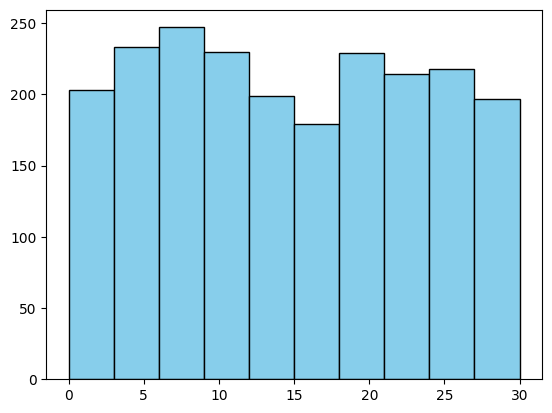

In [96]:

# MMSE distribution (pretty uniform with a dip in the middle)
plt.hist(df['MMSE'], bins=10, color='skyblue', edgecolor='black')

<Axes: xlabel='MMSE', ylabel='Proportion'>

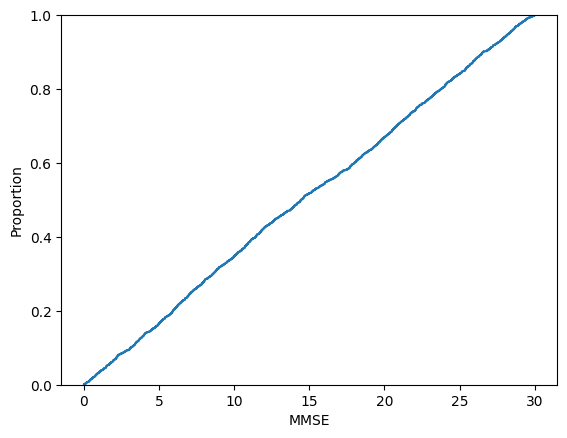

In [97]:
# ECDF
sns.ecdfplot(df["MMSE"])

MMSE is uniformly distributed

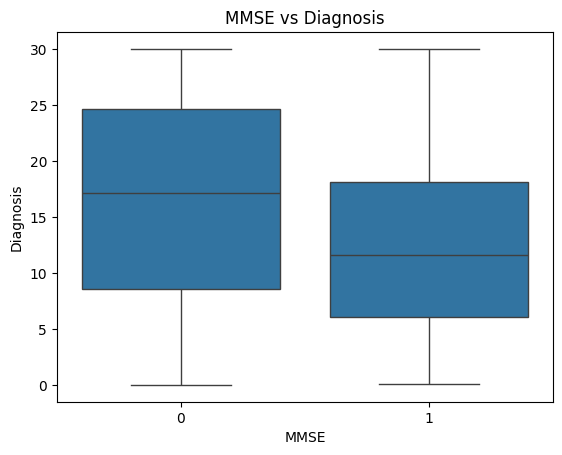

In [98]:
# MMSE vs Diagnosis boxplot

sns.boxplot(x='Diagnosis', y='MMSE', data=df)
plt.xlabel('MMSE')
plt.ylabel('Diagnosis')
plt.title('MMSE vs Diagnosis')
plt.show()

In [99]:
df.groupby('Diagnosis')['MMSE'].median()

Diagnosis
0    17.145797
1    11.565835
Name: MMSE, dtype: float64

Patients diagnosed with Alzheimer's have lower median MMSE scores by about 6 points than those who weren't diagnosed

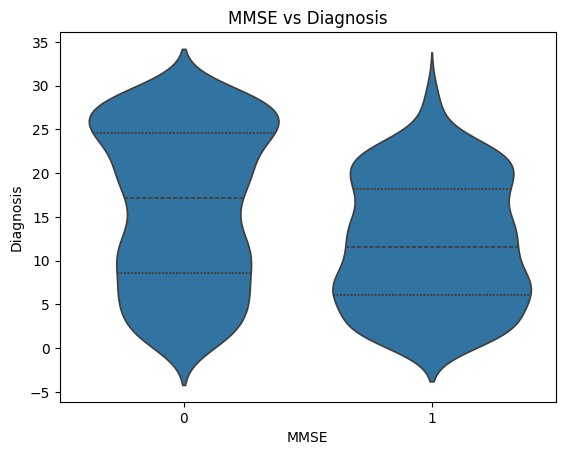

In [100]:
# violin plot

sns.violinplot(x='Diagnosis', y='MMSE', data=df, inner='quartile')
plt.xlabel('MMSE')
plt.ylabel('Diagnosis')
plt.title('MMSE vs Diagnosis')
plt.show()

(array([210., 216., 189., 201., 238., 214., 217., 219., 215., 230.]),
 array([4.59593596e-04, 1.00006034e+00, 1.99966109e+00, 2.99926184e+00,
        3.99886259e+00, 4.99846333e+00, 5.99806408e+00, 6.99766483e+00,
        7.99726558e+00, 8.99686632e+00, 9.99646707e+00]),
 <BarContainer object of 10 artists>)

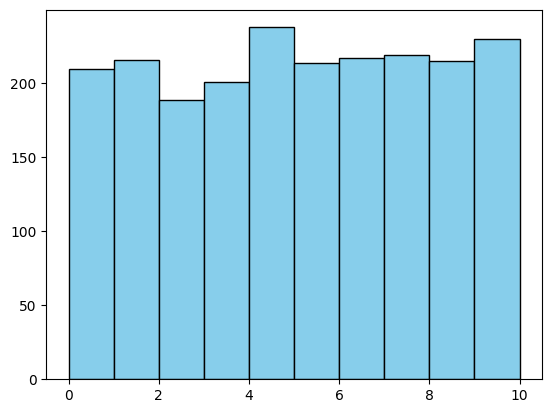

In [101]:
# FunctionalAssessment Distribution (uniform)
plt.hist(df['FunctionalAssessment'], bins=10, color='skyblue', edgecolor='black')

<Axes: xlabel='FunctionalAssessment', ylabel='Proportion'>

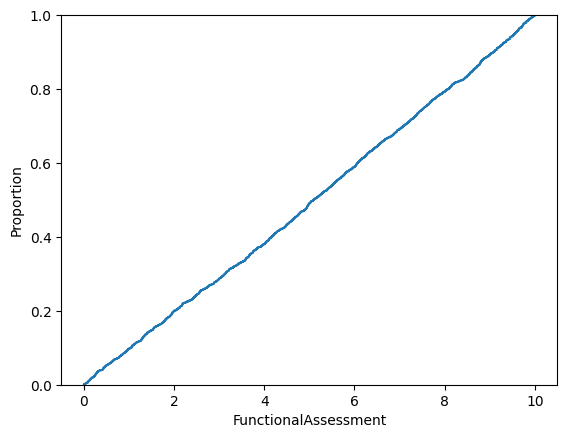

In [102]:
sns.ecdfplot(df["FunctionalAssessment"])

uniform distribution of FunctionalAssessment

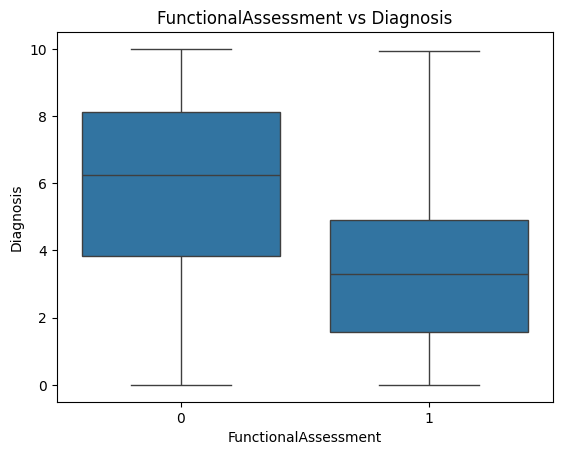

In [103]:
# FunctionalAssessment vs Diagnosis boxplot

sns.boxplot(x='Diagnosis', y='FunctionalAssessment', data=df)
plt.xlabel('FunctionalAssessment')
plt.ylabel('Diagnosis')
plt.title('FunctionalAssessment vs Diagnosis')
plt.show()

In [104]:
df.groupby('Diagnosis')['FunctionalAssessment'].median()


Diagnosis
0    6.24430
1    3.29906
Name: FunctionalAssessment, dtype: float64

<Axes: xlabel='Diagnosis', ylabel='FunctionalAssessment'>

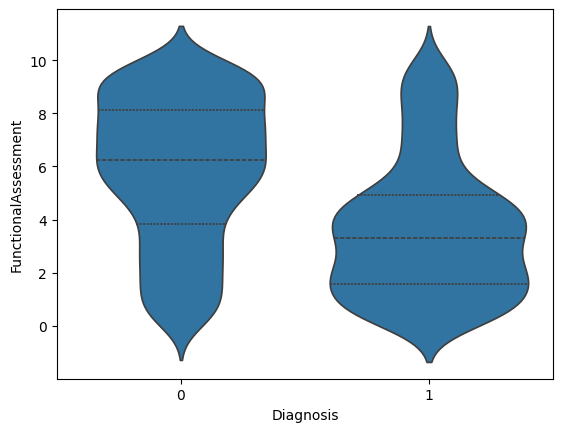

In [105]:
sns.violinplot(data=df, x="Diagnosis", y="FunctionalAssessment", inner="quartile")

50% of patients diagnosed with Alzheimer's scored less than 4 on the FunctionalAssessment scale while 50% of patients who were not diagnosed with Alzheimer's scored above 6

Text(0.5, 1.0, 'MemoryComplaints')

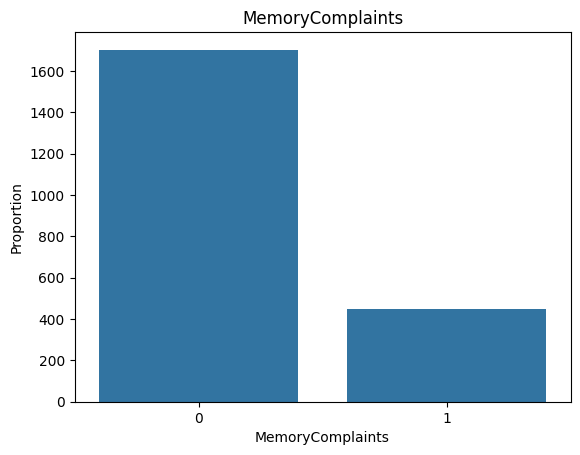

In [106]:
# MemoryComplaints countplot

sns.countplot(x='MemoryComplaints', data=df)
plt.xlabel('MemoryComplaints')
plt.ylabel('Proportion')
plt.title('MemoryComplaints')

More data points have no memory complaints than those with memory complaints
0 = no memory complaints
1 = memory complaints

<Axes: xlabel='MemoryComplaints', ylabel='Diagnosis'>

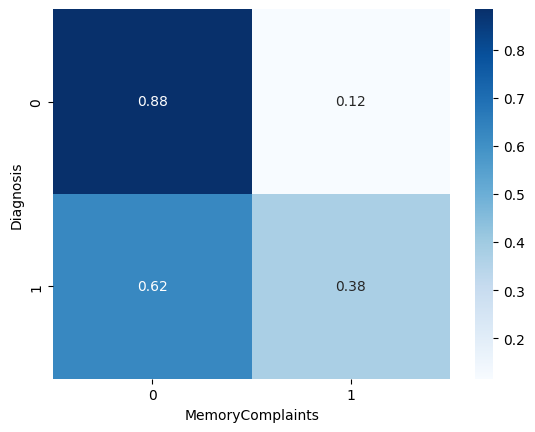

In [107]:
# crosstab heatmap with Diagnosis
cross = pd.crosstab(df["Diagnosis"], df["MemoryComplaints"], normalize="index")
sns.heatmap(cross, annot=True, fmt=".2f", cmap="Blues")


those in the no diagnosis group have a less memory complaints than those in the diagnosis group

Text(0.5, 1.0, 'BehavioralProblems')

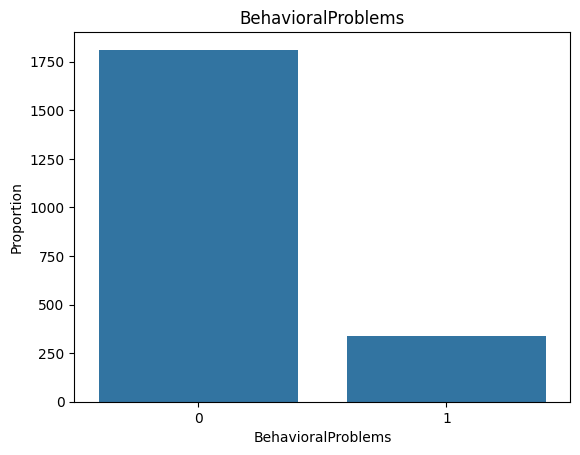

In [108]:
# BehavioralProblems countplot

sns.countplot(x='BehavioralProblems', data=df)
plt.xlabel('BehavioralProblems')
plt.ylabel('Proportion')
plt.title('BehavioralProblems')

More data points have no behavioral complaints than those with behavioral complaints

<Axes: xlabel='BehavioralProblems', ylabel='Diagnosis'>

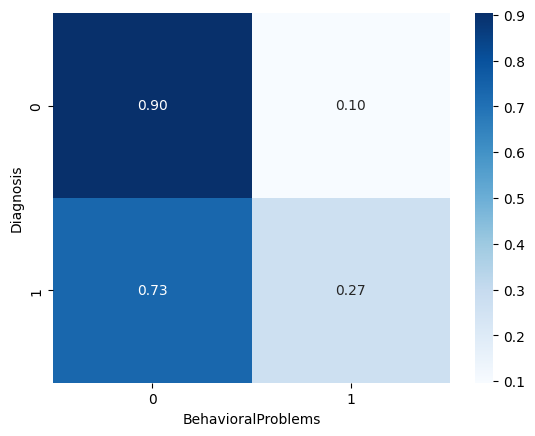

In [109]:
# crosstab heatmap
cross = pd.crosstab(df["Diagnosis"], df["BehavioralProblems"], normalize="index")
sns.heatmap(cross, annot=True, fmt=".2f", cmap="Blues")

Higher prevalence of behavioral problems in the diagnosis group than in the no diagnosis group

(array([244., 237., 169., 216., 197., 212., 196., 243., 207., 228.]),
 array([1.28792770e-03, 1.00113385e+00, 2.00097977e+00, 3.00082569e+00,
        4.00067161e+00, 5.00051752e+00, 6.00036344e+00, 7.00020936e+00,
        8.00005528e+00, 8.99990120e+00, 9.99974712e+00]),
 <BarContainer object of 10 artists>)

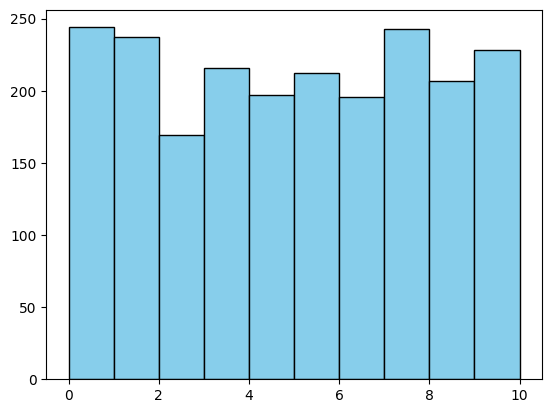

In [110]:
# Activities of Daily Living Score distribution
plt.hist(df['ADL'], bins=10, color='skyblue', edgecolor='black')

<Axes: xlabel='ADL', ylabel='Proportion'>

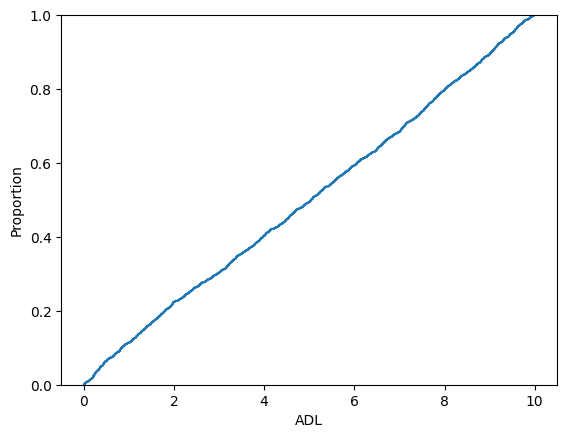

In [111]:
sns.ecdfplot(df["ADL"])

Uniform distribution

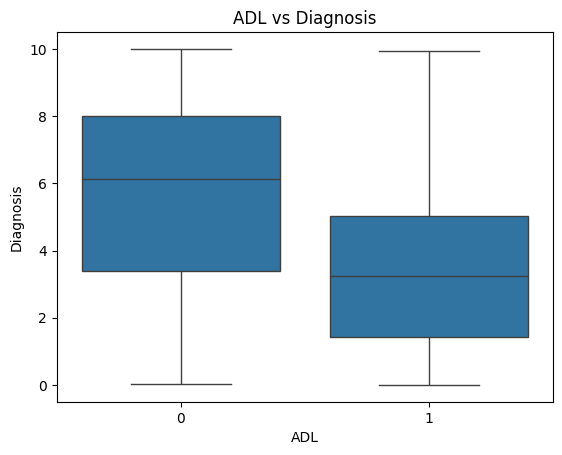

In [112]:
# ADL vs Diagnosis boxplot

sns.boxplot(x='Diagnosis', y='ADL', data=df)
plt.xlabel('ADL')
plt.ylabel('Diagnosis')
plt.title('ADL vs Diagnosis')
plt.show()

In [113]:
df.groupby('Diagnosis')['ADL'].median()

Diagnosis
0    6.13512
1    3.23575
Name: ADL, dtype: float64

The median of the ADL score is higher in the no diagnosis group

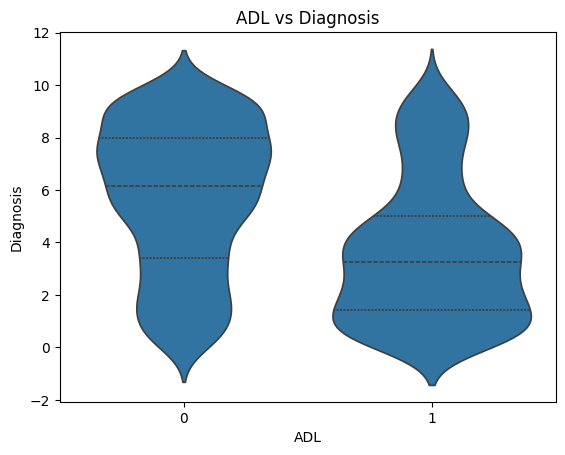

In [114]:
# Violin Plot
sns.violinplot(x='Diagnosis', y='ADL', data=df, inner='quartile')
plt.xlabel('ADL')
plt.ylabel('Diagnosis')
plt.title('ADL vs Diagnosis')
plt.show()

50% of patients diagnosed with Alzheimer's scored less than 4 on the ADL scale while 50% of patients who were not diagnosed with Alzheimer's scored above 6

#### All cognitive assessments seem relevant to determining Alzheimer's diagnosis

## Demographic Analysis

(array([212., 192., 234., 217., 203., 217., 197., 196., 178., 303.]),
 array([60., 63., 66., 69., 72., 75., 78., 81., 84., 87., 90.]),
 <BarContainer object of 10 artists>)

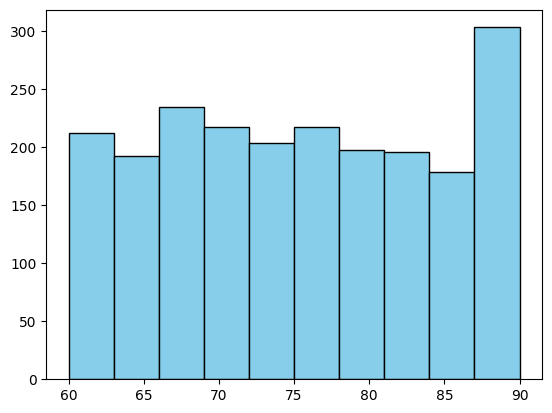

In [115]:
# Age distribution
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')

Higher prevalence of patients older than 85

<Axes: xlabel='Age', ylabel='Proportion'>

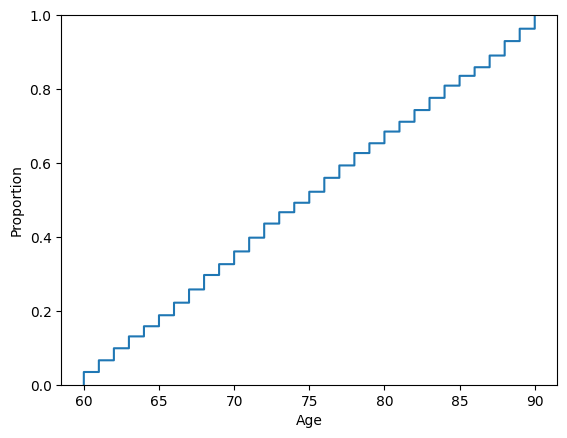

In [116]:
sns.ecdfplot(df["Age"])

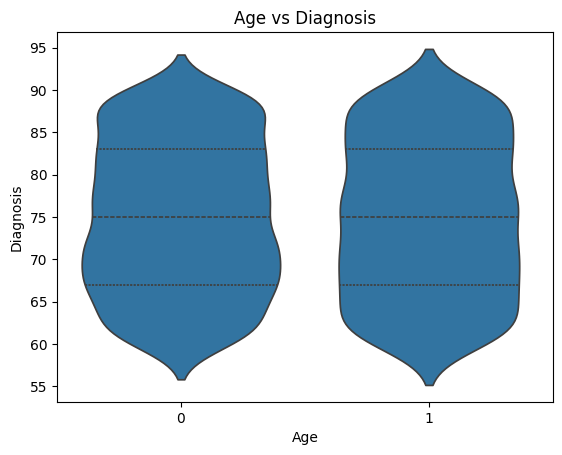

In [117]:
# Violin Plot
sns.violinplot(x='Diagnosis', y='Age', data=df, inner='quartile')
plt.xlabel('Age')
plt.ylabel('Diagnosis')
plt.title('Age vs Diagnosis')
plt.show()

Very similar violin plots with a very similar median of 75 years. While alzheimer's increases with age, the data contains mostly older patients making this metric less relevant.

Text(0.5, 1.0, 'Gender')

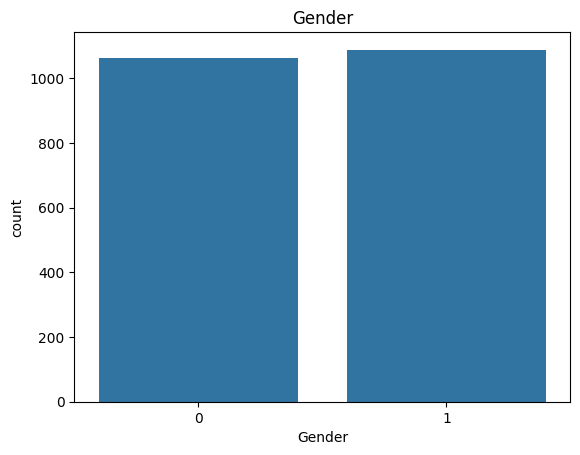

In [118]:
# Gender distribution (uniform)
sns.countplot(x='Gender', data=df)
plt.title('Gender')

Text(0.5, 1.0, 'Gender vs Diagnosis')

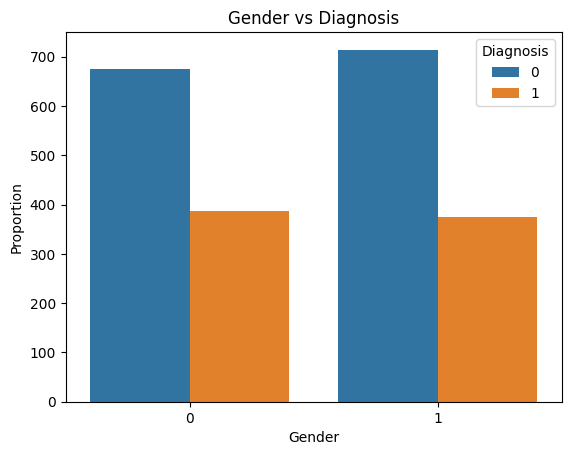

In [119]:
# countplot with Diagnosis
sns.countplot(x='Gender', hue='Diagnosis', data=df)
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Gender vs Diagnosis')

Very similar

Text(0.5, 1.0, 'Ethnicity')

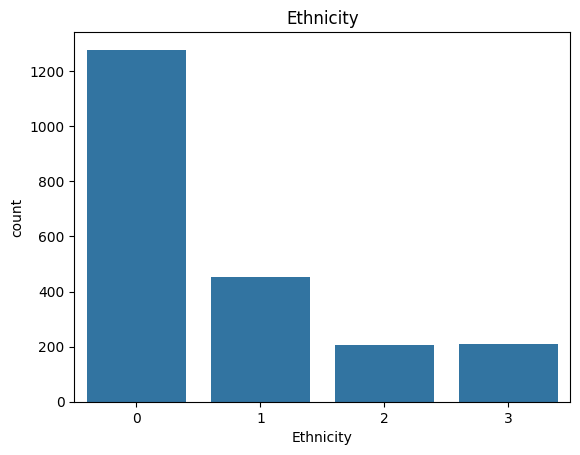

In [120]:
# Ethnicity distribution
sns.countplot(x='Ethnicity', data=df)
plt.title('Ethnicity')

* 0: Caucasian  
* 1: African American  
* 2: Asian  
* 3: Other

More Caucasian data points the others

Text(0.5, 1.0, 'Ethnicity vs Diagnosis')

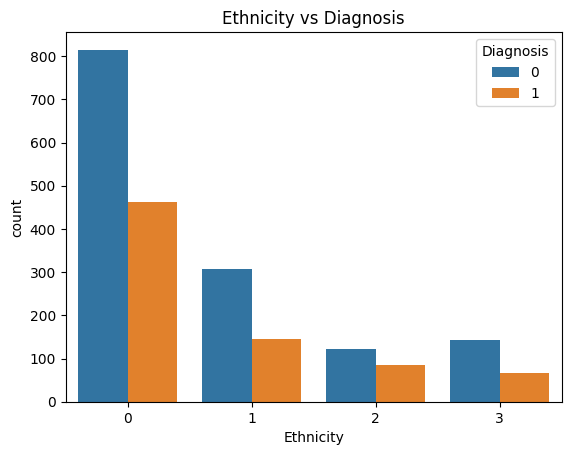

In [123]:
# countplot with Diagnosis
sns.countplot(x='Ethnicity', hue='Diagnosis', data=df)
plt.title('Ethnicity vs Diagnosis')

There seems to be overall less patients in each race in the diagnosis group, but there is no information about certain races having higher diagnosis of alzheimer's due to the left leaning distribution.

Not much information about demographics in predicting diagnosis

## Lifestyle Factors

(array([208., 202., 207., 224., 210., 227., 214., 216., 220., 221.]),
 array([15.00885118, 17.50724281, 20.00563444, 22.50402607, 25.00241769,
        27.50080932, 29.99920095, 32.49759258, 34.99598421, 37.49437584,
        39.99276746]),
 <BarContainer object of 10 artists>)

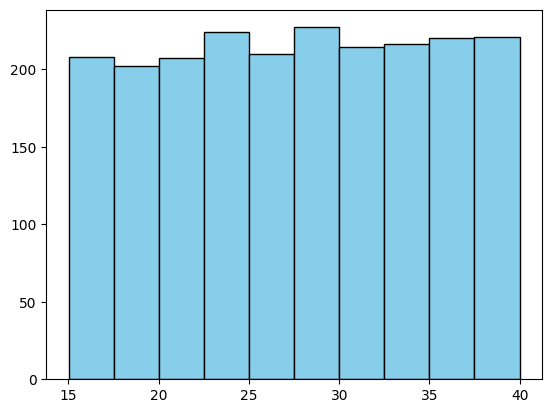

In [124]:
# BMI Distribution
plt.hist(df['BMI'], bins=10, color='skyblue', edgecolor='black')

uniform

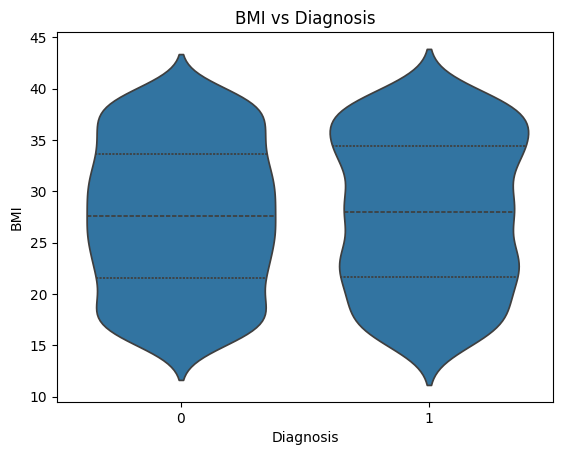

In [126]:
# BMI violin plot

sns.violinplot(x='Diagnosis', y='BMI', data=df, inner='quartile')
plt.title('BMI vs Diagnosis')
plt.show()

Text(0.5, 1.0, 'Smoking')

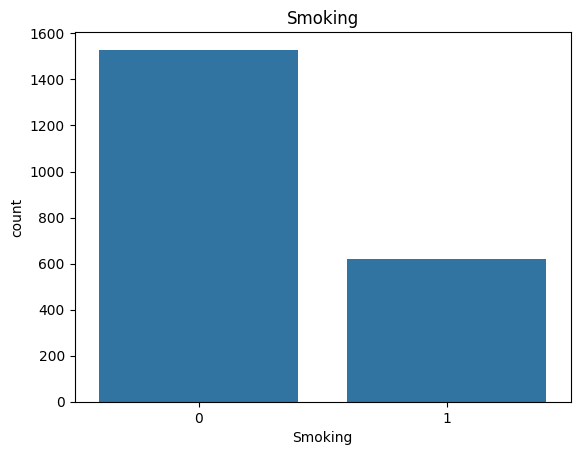

In [127]:
# Smoking Distribution
sns.countplot(x='Smoking', data=df)
plt.title('Smoking')

More data points with patients who don't smoke

<Axes: xlabel='Smoking', ylabel='Diagnosis'>

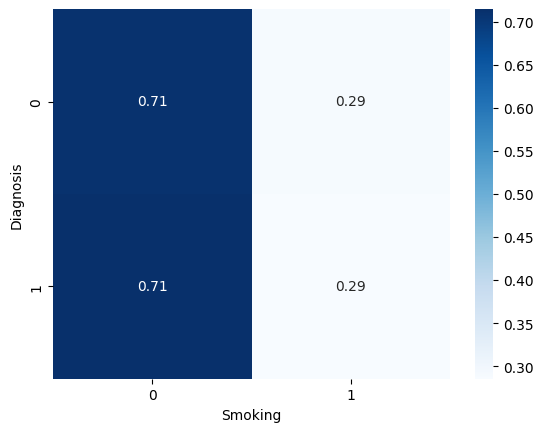

In [128]:
# crosstab heatmap
cross = pd.crosstab(df["Diagnosis"], df["Smoking"], normalize="index")
sns.heatmap(cross, annot=True, fmt=".2f", cmap="Blues")

No useful information from smoking

(array([208., 199., 236., 218., 221., 211., 203., 210., 222., 221.]),
 array([2.00309914e-03, 2.00073213e+00, 3.99946115e+00, 5.99819018e+00,
        7.99691920e+00, 9.99564823e+00, 1.19943773e+01, 1.39931063e+01,
        1.59918353e+01, 1.79905643e+01, 1.99892934e+01]),
 <BarContainer object of 10 artists>)

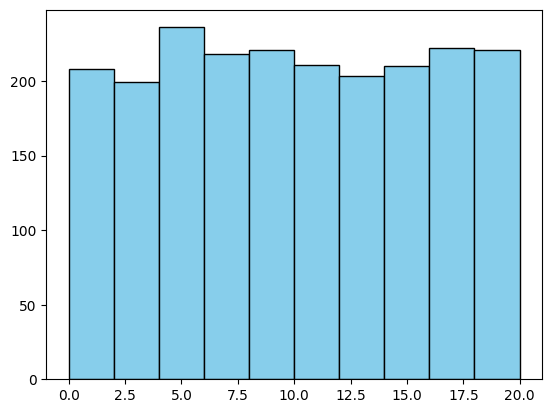

In [132]:
# AlcoholConsumption Distribution
plt.hist(df['AlcoholConsumption'], bins=10, color='skyblue', edgecolor='black')

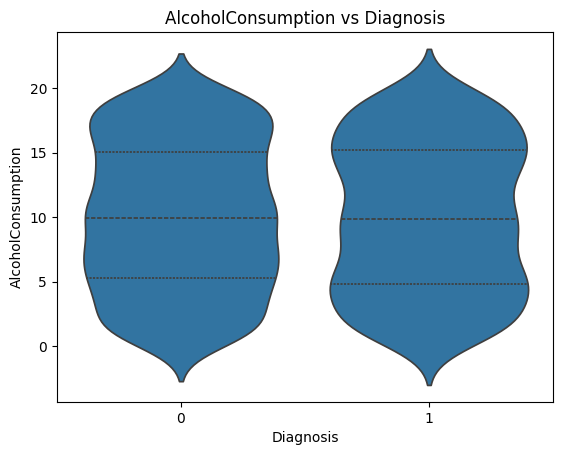

In [133]:
# AlcoholConsumption violin plot

sns.violinplot(x='Diagnosis', y='AlcoholConsumption', data=df, inner='quartile')
plt.title('AlcoholConsumption vs Diagnosis')
plt.show()

In [134]:
# create dataframe with just cognitive tests and target
model_df = df[['ADL', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'Diagnosis']]
model_df.head()


,ADL,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,Diagnosis
0,1.725883,21.463532,6.518877,0,0,0
1,2.592424,20.613267,7.118696,0,0,0
2,7.119548,7.356249,5.895077,0,0,0
3,6.481226,13.991127,8.965106,0,1,0
4,0.014691,13.517609,6.045039,0,0,0


In [142]:
# Standardize ADL, MMSE, FunctionalAssessment

scale = preprocessing.StandardScaler()

cols = ['ADL', 'MMSE', 'FunctionalAssessment']
model_df[cols] = scale.fit_transform(model_df[cols])


/var/folders/f9/vl5q5h8x03zc5d261vg1p0gm0000gn/T/ipykernel_52114/3549953547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[cols] = scale.fit_transform(model_df[cols])


In [145]:
# import into clean data folder
model_df.to_csv('../data/clean/alzheimers.csv', index=False)